In [3]:
!head Campo_ComaCluster_TP2024_Topicos.dat

# objID                 ra                   dec                  z             rp                   dV                   Mr                    gr                    C           dn4000      logSSFR       logSM       
  1237667783373815894   190.36509242025133   22.93077982861949    0.035670865   17.26313891690042    3771.2595981359486   -20.668733995090065   0.4301385027959519    2.1917648   1.337758    -9.822911     9.939624    
  1237667783914684423   200.29327450857346   22.691551278673664   0.031448953   16.695315905655725   2504.6858561038975   -21.08690946816583    0.7010758296076993    2.8515496   1.293469    -9.765995     10.571441   
  1237667910060867716   196.25274943634537   23.49141297002381    0.034404837   11.831493435744028   3391.450978517533    -20.35240821291448    0.7083040696870277    2.8152108   1.7430892   -11.745109    10.202046   
  1237668273507663949   199.06978528401143   20.5682888292296     0.022718353   14.026255439924718   114.49404090642899   -18.288184

# Initial approximation

In [31]:
# As we can see the dat file is simple enough to read, lets use numpy directly
import numpy as np

In [32]:
filename = 'Campo_ComaCluster_TP2024_Topicos.dat'
rawdata = np.loadtxt(filename)
# Simple enough then the header is as follows
header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])

In [33]:
rawdata.shape,header.shape

((3436, 12), (12,))

In [34]:
# lets move the data to an easily understandable dictionary for manipulation :D
# then delete the raw data array to save memory
data = {}
i = 0
for col in header:
    data[col] = rawdata[:,i]
    i += 1
print('dictionary created')
del rawdata
del header

dictionary created


In [46]:
data

{'objID': array([1.23766778e+18, 1.23766778e+18, 1.23766791e+18, ...,
        1.23766744e+18, 1.23766744e+18, 1.23766774e+18]),
 'ra': array([190.36509242, 200.29327451, 196.25274944, ..., 194.50649495,
        194.6576242 , 190.47107725]),
 'dec': array([22.93077983, 22.69155128, 23.49141297, ..., 27.48966584,
        27.46395368, 22.34880181]),
 'z': array([0.03567087, 0.03144895, 0.03440484, ..., 0.02543061, 0.0209099 ,
        0.02320768]),
 'rp': array([17.26313892, 16.69531591, 11.83149344, ...,  1.19052802,
         0.90078389, 11.96794387]),
 'dV': array([3771.25959814, 2504.6858561 , 3391.45097852, ...,  699.18423861,
         657.03116387,   32.30493486]),
 'Mr': array([-20.668734  , -21.08690947, -20.35240821, ..., -20.86004954,
        -19.00411459, -19.0197875 ]),
 'gr': array([0.4301385 , 0.70107583, 0.70830407, ..., 0.70748191, 0.63790145,
        0.56356677]),
 'C': array([2.1917648, 2.8515496, 2.8152108, ..., 2.7672927, 2.4587986,
        2.324248 ]),
 'dn4000': array(

In [18]:
# Now with the data loaded, we will probably need some visualization tools ;D
import matplotlib.pyplot as plt

In [49]:
# Some general Coma Cluster data
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231

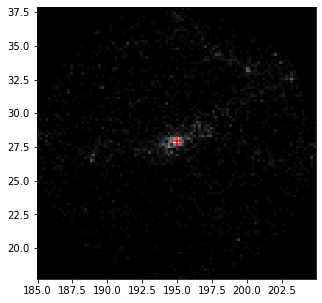

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.hist2d(data['ra'],data['dec'],weights=data['Mr'],bins=100,cmap='Greys')
ax.scatter(ra_coma,dec_coma,c='red',s=100,marker='+')
plt.show()

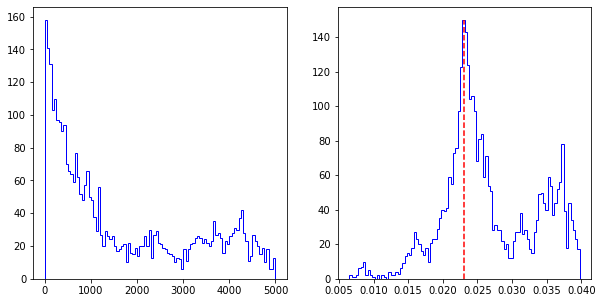

In [91]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(data['dV'],bins=100,histtype='step',color='blue')
axes[1].hist(data['z'],bins=100,histtype='step',color='blue')
axes[1].plot(np.full(10,z_coma),np.linspace(0,150,10),'--r')
plt.show()

In [87]:
# Now we have a reasonable overview of the raw data, to differentiate the cluster members
# Lets define a function for loading the data to dictionary, and then operate on that

# (I) Loading the data

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [108]:
def txt_to_dic(filename):
    """
    Converts the file to a dictionary, makes things easier to read.
    """
    dic = {}
    rawdata = np.loadtxt(filename)
    header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])
    i = 0
    for col in header:
        dic[col] = rawdata[:,i]
        i += 1
    return dic

In [109]:
data = txt_to_dic('Campo_ComaCluster_TP2024_Topicos.dat')
data.keys()

dict_keys(['objID', 'ra', 'dec', 'z', 'rp', 'dV', 'Mr', 'gr', 'C', 'dn4000', 'logSSFR', 'logSM'])

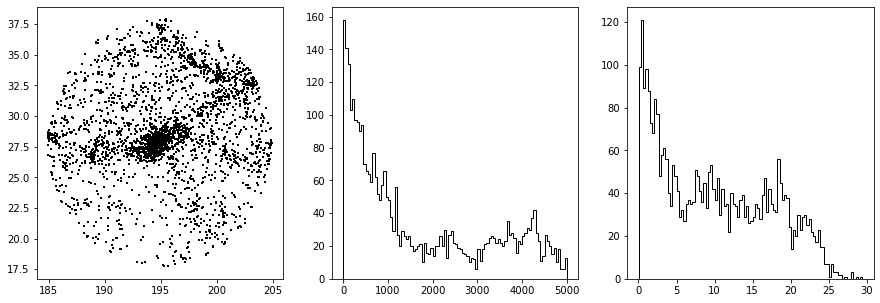

In [110]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].scatter(data['ra'],data['dec'],s=5,marker='+',color='black',zorder=1)
axes[1].hist(data['dV'],bins=100,histtype='step',color='black')
axes[2].hist(data['rp'],bins=100,histtype='step',color='black')
plt.show()

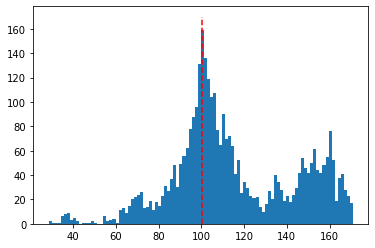

In [139]:
# Lmaoo
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck13

# Check data
cosmo = Planck13
# Some general Coma Cluster data
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231
D_coma = cosmo.lookback_distance(z_coma)

plt.hist(cosmo.lookback_distance(data['z']).value,bins=100)
plt.plot(np.full(10,D_coma),np.linspace(0,170,10),'--',color='red')
plt.show()

[0.05119536 1.66112933 8.66078089] 1691


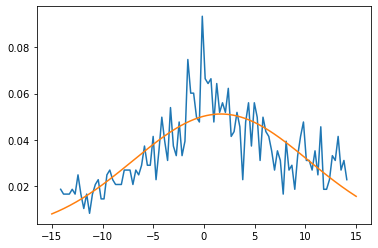

In [200]:
from scipy.optimize import curve_fit

filtr = data['dV'] < 1000
hist, bin_edges = np.histogram(cosmo.lookback_distance(data['z']).value[filtr]-D_coma.value, density=True,bins=100)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1, z_coma, 1]
x = np.linspace(-15,15,400)

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
# Get the fitted curve
hist_fit = gauss(x, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')
print(coeff,len(cosmo.lookback_distance(data['z']).value[filtr]))

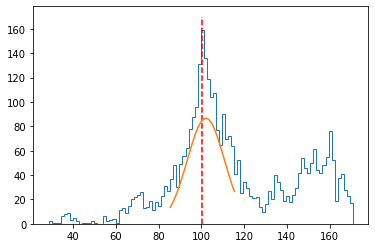

In [201]:
plt.hist(cosmo.lookback_distance(data['z']).value,bins=100,histtype='step')
plt.plot(np.full(10,D_coma.value+coeff[0]),np.linspace(0,170,10),'--',color='red')
plt.plot(x+D_coma.value, hist_fit*1691, label='Fitted data')

###### 3*coeff[2]

In [242]:
# Lets save these important cluster members into a file, and hdf5 file that is
with h5py.File('cluster_member.hdf5','w') as file:
    for key in cluster_member_data.keys():
        file[key] = cluster_member_data[key]

In [243]:
# Lets save all data as well, maybe it will be useful
with h5py.File('Campo.hdf5','w') as file:
    for key in data.keys():
        file[key] = data[key]
    file['count'] = len(data[key])

# (II) Analysis, and questions

In [ ]:
#1.5<2.5mpc
#periferia

In [321]:
# redshifts descargados si pueden ser usados para distancia
# al menos en este caso

In [244]:
# Checking saved data
with h5py.File('Campo.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())
with h5py.File('cluster_member.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())

3436
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>
498
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>


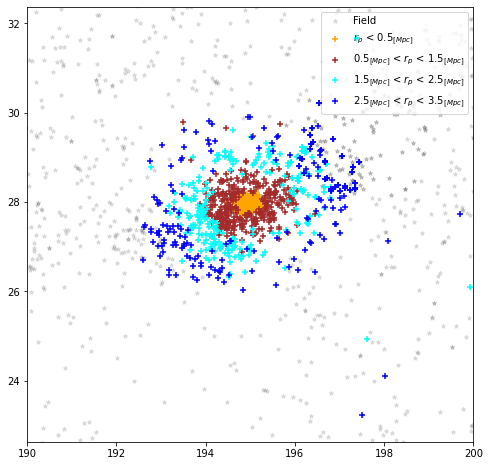

In [16]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
with h5py.File('Campo.hdf5','r') as data:
    ax.scatter(data['ra'],data['dec'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    ax.scatter(data['ra'][region1],data['dec'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    ax.scatter(data['ra'][region2],data['dec'][region2],s=30,marker='+',color='brown',zorder=100,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    ax.scatter(data['ra'][region3],data['dec'][region3],s=30,marker='+',color='cyan',zorder=100,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    ax.scatter(data['ra'][region4],data['dec'][region4],s=30,marker='+',color='blue',zorder=100,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')

ax.legend(loc='upper right')
ax.axis('equal')
ax.set_xlim(190,200)
ax.set_ylim(25,30)
fig.savefig('figures/cluster.png',dpi=100)

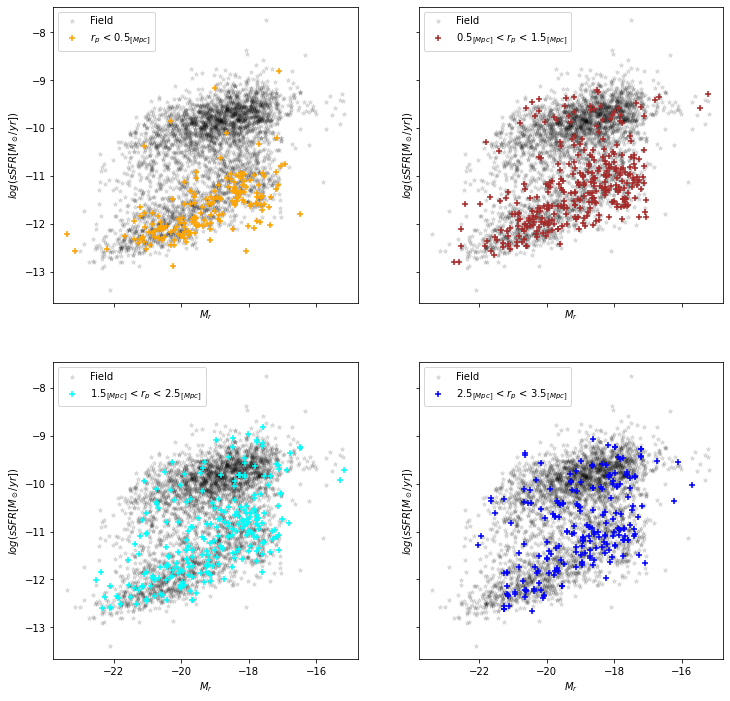

In [27]:
# Lets look at the log sSFR vs Mr
fig, axes = plt.subplots(2,2,figsize=(12,12),sharey=True,sharex=True)
with h5py.File('Campo.hdf5','r') as data:
    for col in axes:
        for ax in col:
            ax.scatter(data['Mr'],data['logSSFR'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    axes[0,0].scatter(data['Mr'][region1],data['logSSFR'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    axes[0,1].scatter(data['Mr'][region2],data['logSSFR'][region2],s=30,marker='+',color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    axes[1,0].scatter(data['Mr'][region3],data['logSSFR'][region3],s=30,marker='+',color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    axes[1,1].scatter(data['Mr'][region4],data['logSSFR'][region4],s=30,marker='+',color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')

for col in axes:
    for ax in col:
        ax.legend()
        ax.set_xlabel(r'$M_r$')
        ax.set_ylabel(r'$log(sSFR {[M_\odot / yr]})$')
fig.savefig('figures/sfrmag_cluster.png',dpi=100)

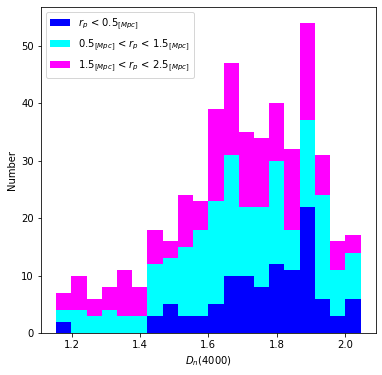

In [310]:
# Lets look at the distribution of Dn4000
fig, ax = plt.subplots(1,1,figsize=(6,6))
bins = 20

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    hist1,bins1,_ = ax.hist(data['dn4000'][region1],bins=bins,color='blue',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$',histtype='stepfilled')
    hist2,bins2,_ = ax.hist(data['dn4000'][region2],bottom=hist1,bins=bins1,color='cyan',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$',histtype='stepfilled')
    hist3,bins3,_ = ax.hist(data['dn4000'][region3],bottom=hist1+hist2,bins=bins2,color='magenta',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$',histtype='stepfilled')
    pass
ax.legend(loc='upper left')
ax.set_xlabel(r'$D_n$(4000)')
ax.set_ylabel(r'Number')
fig.savefig('figures/dn4000_cluster.png',dpi=100)

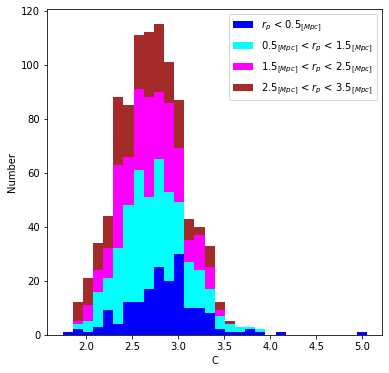

In [203]:
# Lets look at the distribution of Dn4000
fig, ax = plt.subplots(1,1,figsize=(6,6))
bins = 30

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    hist1,bins1,_ = ax.hist(data['C'][region1],bins=bins,color='blue',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$',histtype='stepfilled')
    hist2,bins2,_ = ax.hist(data['C'][region2],bottom=hist1,bins=bins1,color='cyan',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$',histtype='stepfilled')
    hist3,bins3,_ = ax.hist(data['C'][region3],bottom=hist1+hist2,bins=bins2,color='magenta',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$',histtype='stepfilled')
    hist4,bins4,_ = ax.hist(data['C'][region4],bottom=hist1+hist2+hist3,bins=bins3,color='brown',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$',histtype='stepfilled')
    pass
ax.legend(loc='upper right')
ax.set_xlabel(r'C')
ax.set_ylabel(r'Number')
fig.savefig('figures/C_cluster.png',dpi=100)

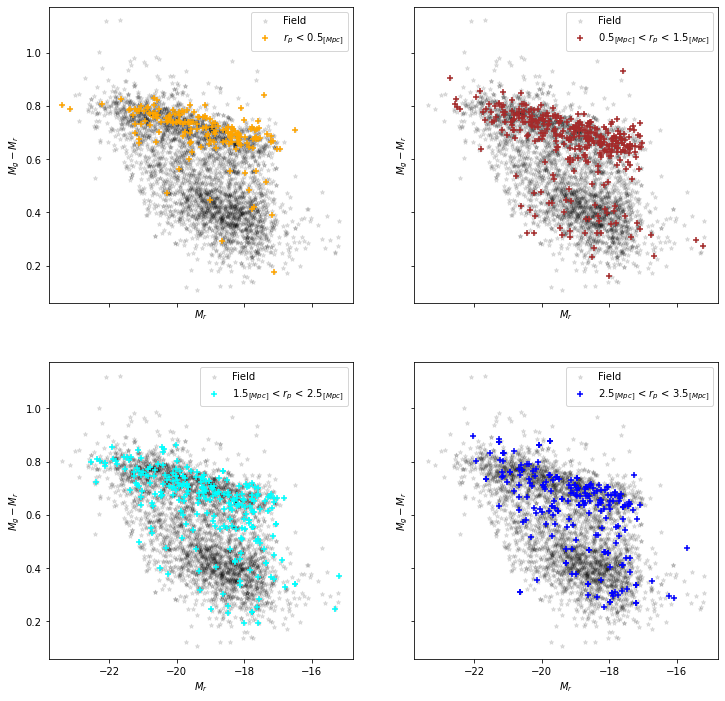

In [28]:
# Lets look at color-magnitude of the cluster members
fig, axes = plt.subplots(2,2,figsize=(12,12),sharex=True,sharey=True)
with h5py.File('Campo.hdf5','r') as data:
    for col in axes:
        for ax in col:
            ax.scatter(data['Mr'],data['gr'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    axes[0,0].scatter(data['Mr'][region1],data['gr'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    axes[0,1].scatter(data['Mr'][region2],data['gr'][region2],s=30,marker='+',color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    axes[1,0].scatter(data['Mr'][region3],data['gr'][region3],s=30,marker='+',color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    axes[1,1].scatter(data['Mr'][region4],data['gr'][region4],s=30,marker='+',color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')
for col in axes:
    for ax in col:
        ax.legend()
        ax.set_xlabel(r'$M_r$')
        ax.set_ylabel(r'$M_g-M_r$')
fig.savefig('figures/cmd_cluster.png',dpi=100)

In [58]:
# 
with h5py.File('Campo.hdf5','r') as data:
    print('     name        ra     dec  ')
    for i in range(len(data['ra'][:])):
        ra = data['ra'][:]
        dec = data['dec'][:]
        rp = data['rp'][:]
        dV = data['dV'][:]
        samplesize = int(0.2 * len(ra))
        ra_sample = np.zeros(samplesize)
        dec_sample = np.zeros(samplesize)
        #####################
        for i in range(samplesize):
            if i < 0.33*samplesize:
                region1 = ((rp <= 0.5) & (dV <= 1250))
                ra_add = ra[region1]
                dec_add = dec[region1]
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
            elif i <= 0.66*samplesize:
                region2 = ((rp > 0.5) & (rp <= 1.5) & (dV <= 1250))
                ra_add = ra[region2]
                dec_add = dec[region2]
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
            elif i <= samplesize:
                region3 = ((rp > 1.5) & (rp <= 2.5) & (dV <= 1250))
                ra_add = ra[region3]
                dec_add = dec[region3]
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
        #######################
for i in range(len(ra_sample)):
    print('   ',i,' ',np.round(ra_sample[i],3),' ',np.round(dec_sample[i],3))

     name        ra     dec  
    0   194.779   27.772
    1   194.723   28.126
    2   194.781   27.768
    3   194.701   28.019
    4   194.949   28.098
    5   194.74   27.785
    6   195.071   28.064
    7   194.834   27.886
    8   195.117   27.956
    9   194.839   27.974
    10   194.881   28.047
    11   194.98   28.128
    12   195.033   28.079
    13   195.046   28.065
    14   194.789   28.041
    15   195.018   28.155
    16   195.057   27.867
    17   194.712   28.084
    18   195.126   28.16
    19   194.864   27.785
    20   195.038   28.17
    21   194.908   27.777
    22   194.92   28.145
    23   194.848   27.92
    24   194.79   27.867
    25   195.186   28.101
    26   194.808   28.076
    27   194.834   28.074
    28   194.854   27.739
    29   194.96   28.144
    30   195.178   27.971
    31   195.219   27.805
    32   194.882   28.101
    33   195.539   27.589
    34   195.685   28.045
    35   195.333   27.961
    36   195.313   27.669
    37   195.402   27.708
